<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.715215,62.863704,0.650903,143.229822,142.559741,0.670081
1,0.0,1.0,81.480612,86.194303,0.318835,177.993751,177.654345,0.339406
2,0.0,2.0,55.983763,38.817669,0.005619,104.807051,104.784781,0.022270
3,0.0,3.0,62.881130,99.254131,-0.120328,172.014934,172.131032,-0.116098
4,0.0,4.0,63.841952,40.750556,0.330434,114.922943,114.571063,0.351880
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,30.783992,96.233001,0.371007,137.388000,137.062083,0.325917
119996,999.0,116.0,97.600147,46.565309,0.094827,154.260284,154.165574,0.094710
119997,999.0,117.0,20.463879,41.621436,0.700951,72.786266,72.142554,0.643712
119998,999.0,118.0,62.253975,34.850955,0.120444,107.225374,107.132012,0.093362


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.715215,62.863704,0.650903,143.229822,142.559741,0.670081
1,0.0,1.0,81.480612,86.194303,0.318835,177.993751,177.654345,0.339406
2,0.0,2.0,55.983763,38.817669,0.005619,104.807051,104.784781,0.022270
3,0.0,3.0,62.881130,99.254131,-0.120328,172.014934,172.131032,-0.116098
4,0.0,4.0,63.841952,40.750556,0.330434,114.922943,114.571063,0.351880
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,30.783992,96.233001,0.371007,137.388000,137.062083,0.325917
119996,999.0,116.0,97.600147,46.565309,0.094827,154.260284,154.165574,0.094710
119997,999.0,117.0,20.463879,41.621436,0.700951,72.786266,72.142554,0.643712
119998,999.0,118.0,62.253975,34.850955,0.120444,107.225374,107.132012,0.093362


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.715215  62.863704  0.650903  143.229822  142.559741  0.670081
      1.0    81.480612  86.194303  0.318835  177.993751  177.654345  0.339406
      2.0    55.983763  38.817669  0.005619  104.807051  104.784781  0.022270
      3.0    62.881130  99.254131 -0.120328  172.014934  172.131032 -0.116098
      4.0    63.841952  40.750556  0.330434  114.922943  114.571063  0.351880
...                ...        ...       ...         ...         ...       ...
999.0 115.0  30.783992  96.233001  0.371007  137.388000  137.062083  0.325917
      116.0  97.600147  46.565309  0.094827  154.260284  154.165574  0.094710
      117.0  20.463879  41.621436  0.700951   72.786266   72.142554  0.643712
      118.0  62.253975  34.850955  0.120444  107.225374  107.132012  0.093362
      119.0  64.414576  62.928291  0.354496  137.697364  137.366015  0.331349

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.715215  62.863704  0.650903  143.229822  142.559741  0.670081
      1.0    81.480612  86.194303  0.318835  177.993751  177.654345  0.339406
      2.0    55.983763  38.817669  0.005619  104.807051  104.784781  0.022270
      3.0    62.881130  99.254131 -0.120328  172.014934  172.131032 -0.116098
      4.0    63.841952  40.750556  0.330434  114.922943  114.571063  0.351880
...                ...        ...       ...         ...         ...       ...
999.0 115.0  30.783992  96.233001  0.371007  137.388000  137.062083  0.325917
      116.0  97.600147  46.565309  0.094827  154.260284  154.165574  0.094710
      117.0  20.463879  41.621436  0.700951   72.786266   72.142554  0.643712
      118.0  62.253975  34.850955  0.120444  107.225374  107.132012  0.093362
      119.0  64.414576  62.928291  0.354496  137.697364  137.366015  0.331349

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.715215,62.863704,0.650903,143.229822,142.559741,0.670081
1,0.0,1.0,81.480612,86.194303,0.318835,177.993751,177.654345,0.339406
2,0.0,2.0,55.983763,38.817669,0.005619,104.807051,104.784781,0.022270
3,0.0,3.0,62.881130,99.254131,-0.120328,172.014934,172.131032,-0.116098
4,0.0,4.0,63.841952,40.750556,0.330434,114.922943,114.571063,0.351880
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,30.783992,96.233001,0.371007,137.388000,137.062083,0.325917
119996,999.0,116.0,97.600147,46.565309,0.094827,154.260284,154.165574,0.094710
119997,999.0,117.0,20.463879,41.621436,0.700951,72.786266,72.142554,0.643712
119998,999.0,118.0,62.253975,34.850955,0.120444,107.225374,107.132012,0.093362


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.715215  62.863704  0.650903  143.229822  142.559741  0.670081
      1.0    81.480612  86.194303  0.318835  177.993751  177.654345  0.339406
      2.0    55.983763  38.817669  0.005619  104.807051  104.784781  0.022270
      3.0    62.881130  99.254131 -0.120328  172.014934  172.131032 -0.116098
      4.0    63.841952  40.750556  0.330434  114.922943  114.571063  0.351880
...                ...        ...       ...         ...         ...       ...
999.0 115.0  30.783992  96.233001  0.371007  137.388000  137.062083  0.325917
      116.0  97.600147  46.565309  0.094827  154.260284  154.165574  0.094710
      117.0  20.463879  41.621436  0.700951   72.786266   72.142554  0.643712
      118.0  62.253975  34.850955  0.120444  107.225374  107.132012  0.093362
      119.0  64.414576  62.928291  0.354496  137.697364  137.366015  0.331349

[120000 rows x 6 columns]

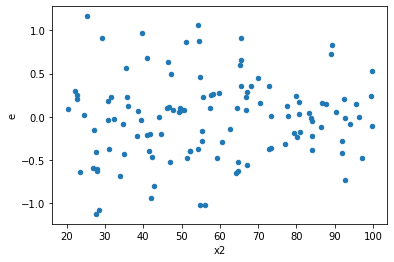

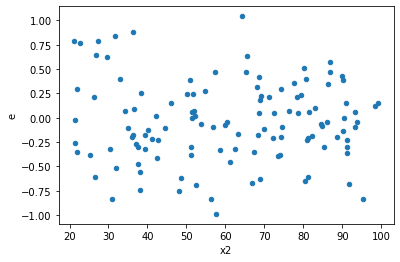

In [17]:
tablenew0 = table.loc[5.0]
tablenew1 = table.loc[10.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

<ipython-input-14-7bd20896c3a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity'


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,46.0,46.0,9.787626341115676,9.953063174005356,0.21277448567642773,0.21637093856533382,1.0169026510743178,0.9549177981964068,0.5225411009017966,0.4774588990982034,Reject001=1 : Homoscedasticity
9.0,46.0,46.0,6.1156371120360316,9.053072888032537,0.1329486328703485,0.1968059323485334,1.48031557827645,0.18723205052785885,0.9063839747360706,0.09361602526392943,Reject001=1 : Homoscedasticity
11.0,46.0,46.0,7.083887169089565,9.544727191576461,0.15399754715412098,0.207494069382097,1.3473855474752245,0.31547152143204915,0.8422642392839754,0.15773576071602458,Reject001=1 : Homoscedasticity
15.0,46.0,46.0,7.95237650290408,8.750389302041775,0.1728777500631322,0.19022585439221248,1.1003489710083862,0.7470969532749276,0.6264515233625362,0.3735484766374638,Reject001=1 : Homoscedasticity
26.0,46.0,46.0,9.527387587659057,10.177491529479326,0.20711712147084907,0.2212498158582462,1.0682352781220275,0.8238384105294325,0.5880807947352837,0.41191920526471626,Reject001=1 : Homoscedasticity
29.0,46.0,46.0,8.929481032604704,9.624814892834332,0.19411915288271095,0.20923510636596374,1.077869459343798,0.8003582117465111,0.5998208941267444,0.40017910587325556,Reject001=1 : Homoscedasticity
30.0,46.0,46.0,8.404173146971644,8.569250922540178,0.182699416238514,0.18628806353348212,1.0196423577527098,0.9476909490838921,0.526154525458054,0.47384547454194603,Reject001=1 : Homoscedasticity
32.0,46.0,46.0,9.7452478827855,9.761190124951382,0.21185321484316305,0.21219978532503003,1.00163589909232,0.9956012612436913,0.5021993693781543,0.49780063062184565,Reject001=1 : Homoscedasticity
41.0,46.0,46.0,8.443964456890766,9.389429656692991,0.18356444471501665,0.20411803601506504,1.1119693485955724,0.7204337296001229,0.6397831351999386,0.36021686480006143,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,9.40036569440029,6.04681498440849,0.20435577596522367,0.13145249966105413,0.643253164928522,0.13828897986544744,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,9.195106205511156,6.2559165001537,0.199893613163286,0.13599818478595,0.6803528268552428,0.19530361269878121,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,8.376690515455373,6.243796552806367,0.1821019677272907,0.1357347076697036,0.7453774902255585,0.3224785807416799,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,9.035829499366718,6.5604044694726,0.19643107607318952,0.14261748846679564,0.7260434108381959,0.2812558904551156,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,10.439546397280571,7.0584442493891615,0.2269466608104472,0.15344444020411221,0.6761255691365898,0.18821581542342145,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,13.722670523642567,5.965295137954659,0.2983189244270123,0.12968032908597085,0.43470366264912863,0.005589530044137175,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,9.787626341115676,9.953063174005356,0.21277448567642773,0.21637093856533382,1.0169026510743178,0.9549177981964068,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,9.230233484409558,6.656107317545297,0.20065724966107734,0.1446979851640282,0.7211201459624916,0.2712000855340147,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,11.80901269520256,7.822955620354686,0.2567176672870122,0.17006425261640623,0.6624563646656745,0.16633354595018196,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      960
Reject001=0 : Heteroscedasticity     40
Name: Result_test, dtype: int64